In [16]:
import pandas as pd

In [17]:
books = pd.read_csv('books.csv')

In [18]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [19]:
books.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

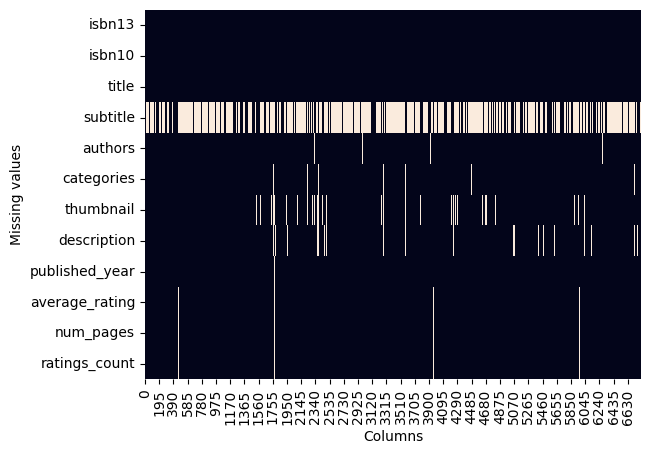

In [21]:
ax = plt.axes()
sns.heatmap(books.isnull().transpose(), cbar= False, ax=ax)
plt.xlabel('Columns')
plt.ylabel('Missing values')
plt.show()

In [22]:
import numpy as np

In [23]:
books['Missing_description'] = np.where(books['description'].isna(), 1, 0)
books['Age_of_the_book'] = 2024 - books['published_year']

In [24]:
books.tail()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Missing_description,Age_of_the_book
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,25.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,31.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0,1,20.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,43.0
6809,9789042003408,9042003405,'I'm Telling You Stories',Jeanette Winterson and the Politics of Reading,Helena Grice;Tim Woods,Literary Criticism,http://books.google.com/books/content?id=2lVyR...,This is a jubilant and rewarding collection of...,1998.0,3.70,136.0,10.0,0,26.0


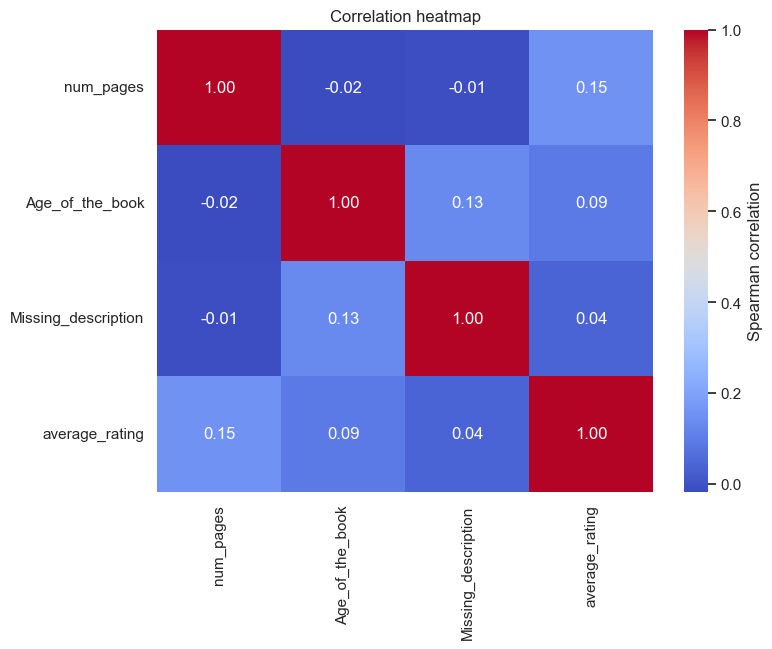

In [25]:
columns_of_intreset = ['num_pages', 'Age_of_the_book','Missing_description', 'average_rating' ]
correlation_matrix = books[columns_of_intreset].corr(method='spearman')
sns.set_theme(style='white')
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={"label": "Spearman correlation"})
heatmap.set_title('Correlation heatmap')
plt.show()

In [30]:
len(books[(books['description'].isna()) |
      (books['num_pages'].isna()) |
      (books['average_rating'].isna()) |
      (books['published_year'].isna()) 
      
      ]), len(books), 303*100//6810

(303, 6810, 4)

In [32]:
book_missing = books[(~books['description'].isna()) &
      (~books['num_pages'].isna()) &
      (~books['average_rating'].isna()) &
      (~books['published_year'].isna()) 
      
      ]
len(book_missing)

6507

In [42]:
book_missing['categories'].value_counts().reset_index().sort_values('count', ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [50]:
book_missing.loc[:,'words_in_description'] = book_missing['description'].str.split().str.len()

In [52]:
book_missing.head(0)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Missing_description,Age_of_the_book,words_in_description


In [61]:
book_missing.loc[book_missing['words_in_description'].between(25,34), 'description']

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
46      No one believes a little girl when she insists...
                              ...                        
6760    Joel, an English teacher, has never really lik...
6766    Discusses the historical and intellectual back...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
Name: description, Length: 1229, dtype: object

In [62]:
book_missing_25_words = book_missing[book_missing['words_in_description']>=25]

In [63]:
len(book_missing_25_words)

5197

In [66]:
book_missing_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Missing_description,Age_of_the_book,words_in_description
0,9.780002e+12,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0.0,20.0,199.0
1,9.780002e+12,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0.0,24.0,205.0
3,9.780006e+12,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0.0,31.0,57.0
4,9.780006e+12,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0.0,22.0,45.0
5,9.780006e+12,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0.0,22.0,75.0


In [67]:
book_missing_25_words["title_&_subtitle"] = (
    np.where(book_missing_25_words['subtitle'].isnull(),book_missing_25_words['title'],
             book_missing_25_words[['title', 'subtitle']].astype(str).agg(":".join,axis=1))
)

/var/folders/bg/s92k1gb90vq8f82_y8j2m2380000gn/T/ipykernel_60513/1260051568.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words["title_&_subtitle"] = (


In [68]:
book_missing_25_words.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Missing_description,Age_of_the_book,words_in_description,title_&_subtitle
0,9.780002e+12,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0.0,20.0,199.0,Gilead
1,9.780002e+12,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0.0,24.0,205.0,Spider's Web:A Novel
3,9.780006e+12,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0.0,31.0,57.0,Rage of angels
4,9.780006e+12,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0.0,22.0,45.0,The Four Loves
5,9.780006e+12,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0.0,22.0,75.0,The Problem of Pain


In [69]:
book_missing_25_words['tagged_description'] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

/var/folders/bg/s92k1gb90vq8f82_y8j2m2380000gn/T/ipykernel_60513/3021074081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['tagged_description'] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


In [76]:
book_missing_25_words[:1]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,Missing_description,Age_of_the_book,words_in_description,title_&_subtitle,tagged_description
0,9.780002e+12,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0.0,20.0,199.0,Gilead,9780002005883.0 A NOVEL THAT READERS and criti...


In [77]:
(
    book_missing_25_words.drop(['subtitle', 'Missing_description', 'Age_of_the_book', 'words_in_description'], axis=1).to_csv('books_cleaned_new.csv', index=False)
)